In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

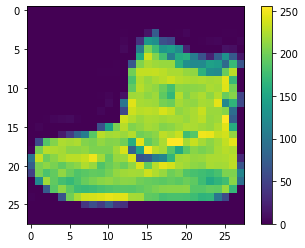

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
train_images = train_images / 255.0

test_images = test_images / 255.0

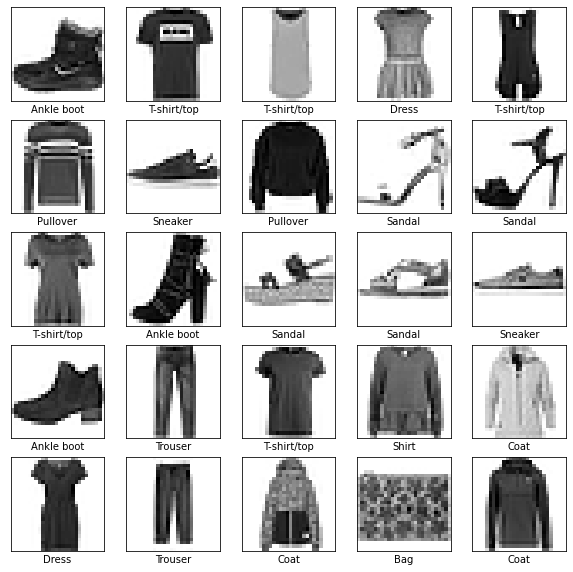

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0841 - accuracy: 0.6604
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6404 - accuracy: 0.7704
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5651 - accuracy: 0.7968
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5219 - accuracy: 0.8155
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4937 - accuracy: 0.8260
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4738 - accuracy: 0.8334
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4588 - accuracy: 0.8384
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4471 - accuracy: 0.8430
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4371 - accuracy: 0.8451
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.428

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4583 - accuracy: 0.8358 - 648ms/epoch - 2ms/step

Test accuracy: 0.8357999920845032


In [28]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [29]:
predictions[0]

array([3.4662369e-07, 3.1026982e-08, 4.2634651e-06, 4.0110758e-06,
       8.6061718e-06, 1.5220775e-01, 1.6043110e-05, 2.2079089e-01,
       4.1433498e-03, 6.2282473e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

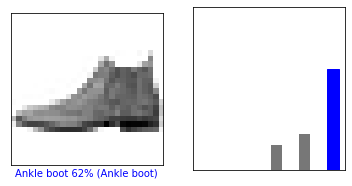

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

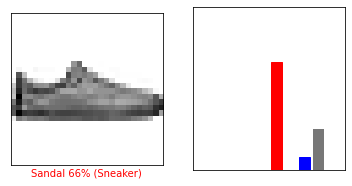

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

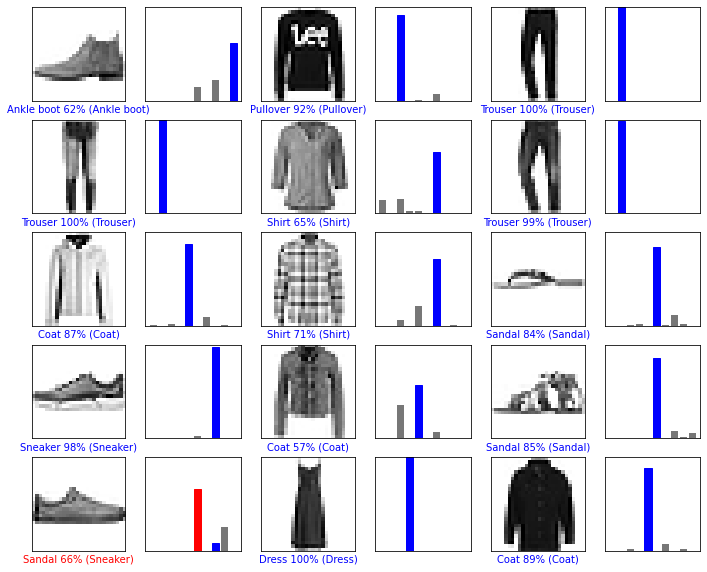

In [35]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [36]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [37]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[3.4662403e-07 3.1026804e-08 4.2634651e-06 4.0110722e-06 8.6061718e-06
  1.5220767e-01 1.6043110e-05 2.2079101e-01 4.1433475e-03 6.2282473e-01]]


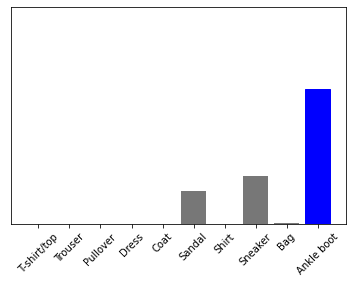

In [39]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [40]:
np.argmax(predictions_single[0])

9